In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import metrics
import time

In [106]:
x = np.array([26, 25, 29, 30, 26, 35, 31, 28, 26, 30])
y = np.array([32, 28, 29, 29, 27, 38, 31, 33, 28, 32])

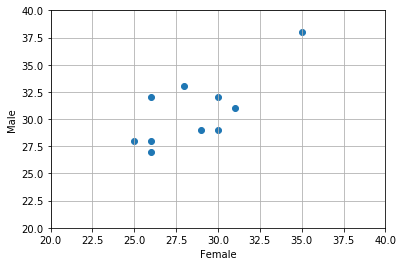

In [107]:
plt.scatter(x, y)
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel('Female')
plt.ylabel('Male')
plt.grid()
plt.show()

<br>
<br>
<br>
<br>

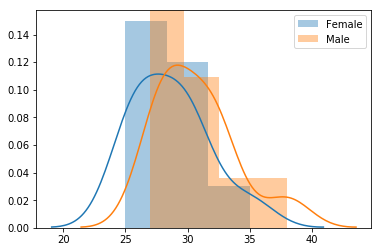

In [108]:
sns.distplot(x, label='Female')
sns.distplot(y, label='Male')
plt.legend()
plt.show()

In [109]:
stats = pd.DataFrame([[np.mean(x), np.mean(y)],
                      [np.var(x), np.var(y)]],
                      columns=['female', 'male'], index=['mu', 'sig2'])
stats

,female,male
mu,28.60,30.70
sig2,8.44,9.61


In [110]:
sp.stats.normaltest(x)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=2.1732433717539092, pvalue=0.33735425941869984)

In [111]:
sp.stats.normaltest(y)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=4.837761870815189, pvalue=0.0890211821922777)

<br>
<br>
<br>
<br>

\begin{equation}
\mathcal{N}(x \space | \space \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} e ^ {-\dfrac{(x-\mu)^2}{2\sigma^2}} 
\end{equation}

\begin{align}
Norm_{Female}(x \space | \space \mu=28.6, \sigma^2=8.44) \\
Norm_{Male}(x \space | \space \mu=30.7, \sigma^2=9.61)
\end{align}

<br>
<br>
<br>
<br>

In [112]:
f_mu = 28.6
f_var = 8.44
normal_f = lambda x: (1/np.sqrt(2*np.pi*f_var)) * (np.e**(-(x-f_mu)**2 / (2*f_var)))

m_mu = 30.7
m_var = 9.61
normal_m = lambda x: (1/np.sqrt(2*np.pi*m_var)) * (np.e**(-(x-m_mu)**2 / (2*m_var)))

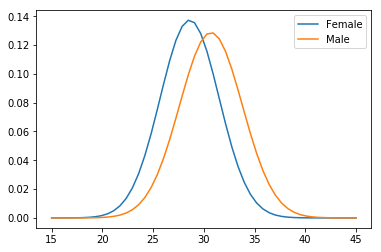

In [113]:
x_space = np.linspace(15, 45)
plt.plot(x_space, normal_f(x_space), label='Female')
plt.plot(x_space, normal_m(x_space), label='Male')
plt.legend()
plt.show()

<br>
<br>
<br>
<br>

In [114]:
female = sp.stats.norm.fit(x)
male = sp.stats.norm.fit(y)

In [115]:
# ititialize
x_sample0 = []
y_sample0 = []
cnt0 = 0

trial 19


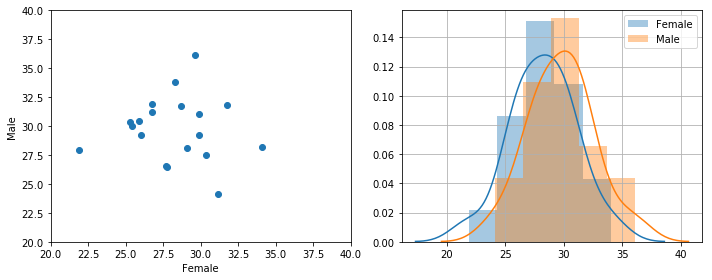

In [134]:
# generate data
x_sample0.append(sp.stats.norm.rvs(female[0], female[1]))
y_sample0.append(sp.stats.norm.rvs(male[0], male[1]))
cnt0 += 1
print('trial {}'.format(cnt0))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(x_sample0, y_sample0)
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel('Female')
plt.ylabel('Male')

plt.subplot(1,2,2)
sns.distplot(x_sample0, label='Female')
sns.distplot(y_sample0, label='Male')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

<br>
<br>
<br>
<br>

\begin{align}
\hat{y} = 0.898x + 4.962 \\
\end{align}

In [135]:
a = 0.898
b = 4.962
opt = lambda x: a * x + b

<br>
<br>
<br>
<br>

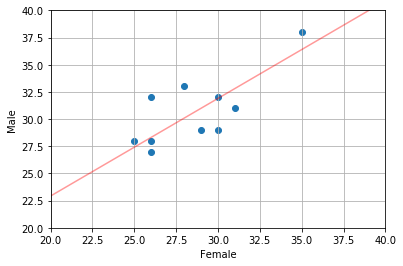

In [136]:
plt.scatter(x, y)
x_space = np.linspace(-20, 100, 200)
y_space = opt(x_space)
plt.plot(x_space, y_space, c='r', alpha=.4)
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel('Female')
plt.ylabel('Male')
plt.grid()
plt.show()

\begin{align}
f(x) &= 0.898x + 4.962 \\
&= 0.898g(x) + 4.962
\end{align}

<br>
<br>
<br>
<br>

In [137]:
# ititialize
x_sample1 = []
y_sample1 = []
cnt1 = 0

trial 13


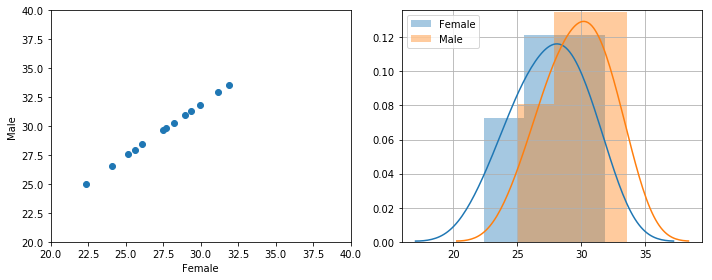

In [150]:
# generate data
x_sample1.append(sp.stats.norm.rvs(female[0], female[1]))
y_sample1.append(opt(x_sample1[-1]))
cnt1 += 1
print('trial {}'.format(cnt1))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(x_sample1, y_sample1)
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel('Female')
plt.ylabel('Male')

plt.subplot(1,2,2)
sns.distplot(x_sample1, label='Female')
sns.distplot(y_sample1, label='Male')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

<br>
<br>
<br>
<br>

\begin{align}
f(x) &= 0.898g(x) + 4.962 + noise
\end{align}

<br>
<br>
<br>
<br>

In [151]:
y_hat = np.array([opt(x) for x in x])
error = y_hat - y
error

array([-3.69 , -0.588,  2.004,  2.902,  1.31 , -1.608,  1.8  , -2.894,
        0.31 , -0.098])

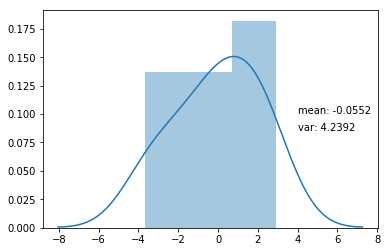

In [152]:
sns.distplot(error)
plt.text(4, 0.1, 'mean: {}'.format(round(error.mean(), 4)))
plt.text(4, 0.085, 'var: {}'.format(round(error.var(), 4)))
plt.show()

<br>
\begin{align}
f(x) &= 0.898g(x) + 4.962 + noise
\end{align}
<br>

In [153]:
opt_rvs = lambda x, noise: x + noise

In [154]:
error_dist = sp.stats.norm.fit(error)

In [155]:
# ititialize
x_sample2 = []
y_sample2 = []
cnt2 = 0

trial 10


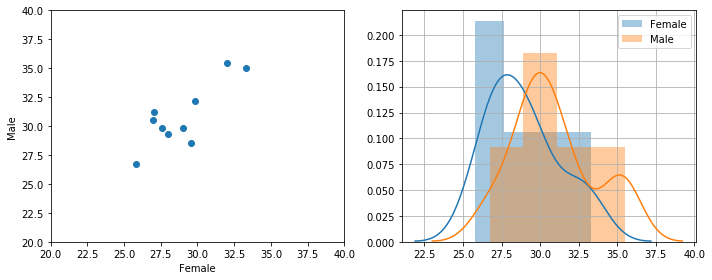

In [165]:
# generate data
x_sample2.append(sp.stats.norm.rvs(female[0], female[1]))
y_sample2.append(opt_rvs(opt(x_sample2[-1]), sp.stats.norm.rvs(error_dist[0], error_dist[1])))
cnt2 += 1
print('trial {}'.format(cnt2))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(x_sample2, y_sample2)
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel('Female')
plt.ylabel('Male')

plt.subplot(1,2,2)
sns.distplot(x_sample2, label='Female')
sns.distplot(y_sample2, label='Male')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

<br>
<br>
<br>
<br>

\begin{align}
\hat{y} = ax + b + \epsilon
\end{align}

<br>

\begin{align}
\begin{bmatrix}
    x_{11} &  1 \\
    x_{21} &  1 \\
    ...\\
    x_{n1} &  1 \\
\end{bmatrix}
\begin{bmatrix}
    a \\
    b \\
\end{bmatrix}
+
\begin{bmatrix}
    \epsilon_{11} \\
    \epsilon_{21} \\
    ...\\
    \epsilon_{n1} \\
\end{bmatrix}
=
\begin{bmatrix}
    \hat{y}_{11} \\
    \hat{y}_{21} \\
    ...\\
    \hat{y}_{n1} \\
\end{bmatrix}
\end{align}

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

\begin{align}
x^2 - 2x + 3 &= 0
\end{align}

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

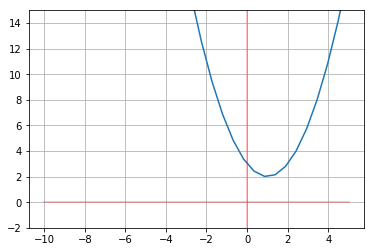

In [23]:
f = lambda x: x**2 + (-2.0 * x) + 3.0
x = np.linspace(-10, 5, 30)
y = f(x)
plt.plot(x, y)
plt.plot([-10, 5], [0,0], c='red', alpha=.3)
plt.plot([0, 0], [-2, 15], c='red', alpha=.3)
plt.ylim(-2, 15)
plt.grid()
plt.show()

\begin{align}
x^2 - 2x + 3 \\
= x(x - 2) + |3| \\
= (x - 1)^2 + |2| \\
\end{align}
<p>
<center>which is better?</center>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

\begin{align}
x^2 - 2x + 3 &= (x^2 -2x + 1) + 2 \\
&= (x - 1)^2 + 2
\end{align}

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

\begin{align}
f(x) &= x^2 - 2x + 3 \\
f^\prime(x) &= 2x -2 \\
&= 0
\end{align}

\begin{align}
then, \\
2x - 2 = 0 \\
2x = 2 \\
x = 1
\end{align}

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

\begin{align}
x^3 - 3x^2 + 2 &= 0
\end{align}

<br>
<br>
<br>
<br>

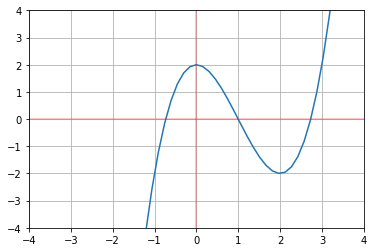

In [24]:
f = lambda x: x**3 + (-3.0 * x**2) + 2.0
x = np.linspace(-10, 5, 100)
y = f(x)
plt.plot(x, y)
plt.plot([-4, 4], [0,0], c='red', alpha=.3)
plt.plot([0, 0], [-4, 4], c='red', alpha=.3)
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.grid()
plt.show()

\begin{align}
f(x) &= x^3 - 3x^2 + 2 \\
f^\prime(x) &= 3x^2 - 6x \\
&= 0
\end{align}

\begin{align}
then, \\
3x^2 -6x = 0 \\
3x(x - 2) = 0 \\
x = 0 \space or \space 2
\end{align}

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

\begin{align}
f(x) &= x^2 - 2x + 3 \\
\end{align}

In [166]:
f = lambda x: x**2 + (-2.0 * x) + 3.0

<br>
\begin{align}
f^\prime(x) &= 2x -2 \\
\end{align}

In [167]:
derivative = lambda x: 2 * x - 2

<br>
\begin{equation}
x^{k+1} = x^{k} - \text{learning_rate} \times f^\prime(x^{k})
\end{equation}

In [168]:
def steepest_gradient_descent(function, derivative, epoch, learning_rate, init, verbose=False):
    x = init
    x_path = []
    y_path = []
    slope_path = []
    step_path = []
    
    for i in range(epoch):
        y = function(x)
        y_path.append(y)
        x_path.append(x)
        slope = derivative(x)
        slope_path.append(slope)
        step = - learning_rate * slope
        step_path.append(step)
        
        if verbose == True:
            print('{} x:{}, y:{}, slope:{}, step:{}'.format(i, round(x, 4), round(y, 4), round(slope, 4), round(step, 4)))
        
        # update next x
        x = x + step
    return x_path, y_path, slope_path, step_path

In [169]:
x_path, y_path, slope_path, step_path = steepest_gradient_descent(function=f, derivative=derivative, epoch=20, init=4,
                                                       learning_rate=.1, verbose=True)

0 x:4, y:11.0, slope:6, step:-0.6
1 x:3.4, y:7.76, slope:4.8, step:-0.48
2 x:2.92, y:5.6864, slope:3.84, step:-0.384
3 x:2.536, y:4.3593, slope:3.072, step:-0.3072
4 x:2.2288, y:3.5099, slope:2.4576, step:-0.2458
5 x:1.983, y:2.9664, slope:1.9661, step:-0.1966
6 x:1.7864, y:2.6185, slope:1.5729, step:-0.1573
7 x:1.6291, y:2.3958, slope:1.2583, step:-0.1258
8 x:1.5033, y:2.2533, slope:1.0066, step:-0.1007
9 x:1.4027, y:2.1621, slope:0.8053, step:-0.0805
10 x:1.3221, y:2.1038, slope:0.6442, step:-0.0644
11 x:1.2577, y:2.0664, slope:0.5154, step:-0.0515
12 x:1.2062, y:2.0425, slope:0.4123, step:-0.0412
13 x:1.1649, y:2.0272, slope:0.3299, step:-0.033
14 x:1.1319, y:2.0174, slope:0.2639, step:-0.0264
15 x:1.1056, y:2.0111, slope:0.2111, step:-0.0211
16 x:1.0844, y:2.0071, slope:0.1689, step:-0.0169
17 x:1.0676, y:2.0046, slope:0.1351, step:-0.0135
18 x:1.054, y:2.0029, slope:0.1081, step:-0.0108
19 x:1.0432, y:2.0019, slope:0.0865, step:-0.0086


In [195]:
x = np.linspace(-10, 5, 100)
y = f(x)
epoch = 0
xp_show = []
yp_show = []

epoch 9


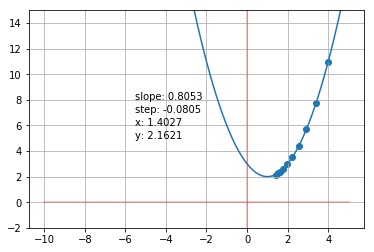

In [205]:
print('epoch {}'.format(epoch))
plt.plot(x, y)
plt.plot([-10, 5], [0,0], c='red', alpha=.3)
plt.plot([0, 0], [-2, 15], c='red', alpha=.3)
plt.ylim(-2, 15)
plt.grid()
plt.text(-5.5, 8, 'slope: {}'.format(round(slope_path[epoch], 4)))
plt.text(-5.5, 7, 'step: {}'.format(round(step_path[epoch], 4)))
plt.text(-5.5, 6, 'x: {}'.format(round(x_path[epoch], 4)))
plt.text(-5.5, 5, 'y: {}'.format(round(y_path[epoch], 4)))
xp_show.append(x_path[epoch])
yp_show.append(y_path[epoch])
plt.scatter(xp_show, yp_show)
epoch += 1
plt.show()

<br>
### non-convex function

\begin{align}
f(x) &= x^4 - 2x^2 + x \\
\end{align}

In [234]:
f = lambda x: x**4 + (-2.0 * x**2) + x

<br>
\begin{align}
f^\prime(x) &= 4x^3 - 4x \\
\end{align}

In [235]:
derivative = lambda x: 4 * x**3 - 4 * x

In [237]:
x_path, y_path, slope_path, step_path = steepest_gradient_descent(function=f, derivative=derivative, epoch=20, init=1.5,
                                                       learning_rate=0.3, verbose=True)

0 x:1.5, y:2.0625, slope:7.5, step:-2.25
1 x:-0.75, y:-1.5586, slope:1.3125, step:-0.3937
2 x:-1.1438, y:-2.0488, slope:-1.4099, step:0.423
3 x:-0.7208, y:-1.49, slope:1.3852, step:-0.4156
4 x:-1.1364, y:-2.0515, slope:-1.3242, step:0.3973
5 x:-0.7391, y:-1.5332, slope:1.3414, step:-0.4024
6 x:-1.1415, y:-2.0497, slope:-1.3839, step:0.4152
7 x:-0.7264, y:-1.5032, slope:1.3725, step:-0.4118
8 x:-1.1381, y:-2.0509, slope:-1.3444, step:0.4033
9 x:-0.7348, y:-1.5231, slope:1.3523, step:-0.4057
10 x:-1.1405, y:-2.0501, slope:-1.3716, step:0.4115
11 x:-0.729, y:-1.5094, slope:1.3664, step:-0.4099
12 x:-1.1389, y:-2.0506, slope:-1.3533, step:0.406
13 x:-0.7329, y:-1.5186, slope:1.3569, step:-0.4071
14 x:-1.14, y:-2.0503, slope:-1.3658, step:0.4098
15 x:-0.7302, y:-1.5123, slope:1.3634, step:-0.409
16 x:-1.1392, y:-2.0505, slope:-1.3574, step:0.4072
17 x:-0.732, y:-1.5166, slope:1.359, step:-0.4077
18 x:-1.1397, y:-2.0503, slope:-1.3632, step:0.4089
19 x:-0.7308, y:-1.5137, slope:1.362, step:-

In [238]:
x = np.linspace(-10, 5, 100)
y = f(x)
epoch = 0
xp_show = []
yp_show = []

epoch 4


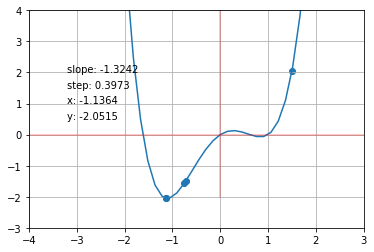

In [243]:
print('epoch {}'.format(epoch))
plt.plot(x, y)
plt.plot([-10, 5], [0,0], c='red', alpha=.3)
plt.plot([0, 0], [-2, 15], c='red', alpha=.3)
plt.ylim(-3, 4)
plt.xlim(-4, 3)
plt.grid()
plt.text(-3.2, 2., 'slope: {}'.format(round(slope_path[epoch], 4)))
plt.text(-3.2, 1.5, 'step: {}'.format(round(step_path[epoch], 4)))
plt.text(-3.2, 1, 'x: {}'.format(round(x_path[epoch], 4)))
plt.text(-3.2, 0.5, 'y: {}'.format(round(y_path[epoch], 4)))
xp_show.append(x_path[epoch])
yp_show.append(y_path[epoch])
plt.scatter(xp_show, yp_show)
epoch += 1
plt.show()